<a href="https://colab.research.google.com/github/anishdass/MyMLRepository/blob/master/NewProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Project lifted from

youtube_link='https://www.youtube.com/watch?v=eMOA1pPVUc4&t=2031s'

In [0]:
import pandas as pd
import numpy as np
import os

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path=r'/content/drive/My Drive/Colab Notebooks/Sales_Data'
path1='./Sales_Data'
path2='/'

files =[file for file in os.listdir(path)]

In [88]:
all_months_data=pd.DataFrame()

for file in files:
  df=pd.read_csv(path+'/' + file)
  all_months_data=pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

all_data=pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [0]:
all_data['Month']=3

In [90]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",3
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",3
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",3
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",3
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",3


In [0]:
all_data['Month']=all_data['Order Date'].str[0:2]

In [92]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10


In [93]:
type(all_data['Month'][0])

str

In [94]:
all_data['Month'].unique()

array(['08', 'Or', nan, '09', '04', '05', '02', '03', '01', '12', '10',
       '07', '06', '11'], dtype=object)

In [95]:
all_data['Month'].dropna()

0         08
1         08
2         08
3         08
4         08
          ..
186845    10
186846    10
186847    10
186848    10
186849    10
Name: Month, Length: 186305, dtype: object

In [96]:
all_data['Month'].unique()

array(['08', 'Or', nan, '09', '04', '05', '02', '03', '01', '12', '10',
       '07', '06', '11'], dtype=object)

In [97]:
all_data['Month'].unique()

array(['08', 'Or', nan, '09', '04', '05', '02', '03', '01', '12', '10',
       '07', '06', '11'], dtype=object)

In [0]:
all_data=all_data.dropna()

In [0]:
all_data=all_data[all_data['Month']!='Or']

In [100]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10


In [0]:
all_data['Month']=all_data['Month'].astype(int)

In [102]:
all_data['Month'][0].dtype

dtype('int64')

In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


In [0]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')

In [0]:
all_data['Price Each']=all_data['Price Each'].astype('float')

In [106]:
all_data['Total_sale']= all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00


In [0]:
results=all_data.groupby('Month').sum()

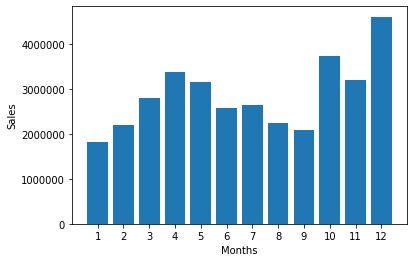

In [108]:
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months, results['Total_sale'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [109]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00


In [110]:
all_data['Purchase Address'].nunique()

140787

In [111]:
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x) +' '+ get_state(x))
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco CA
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles CA
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco CA
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle WA


In [112]:
max_city=all_data['Total_sale'].idxmax()
print(max_city)

16728


In [0]:
results1=all_data.groupby('City').sum()

Text(0, 0.5, 'Sales')

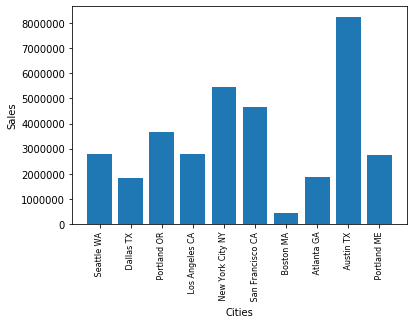

In [115]:
cities=all_data['City'].unique()

plt.bar(cities, results1['Total_sale'])

plt.xticks(cities, rotation='vertical', size=8)

plt.xlabel('Cities')

plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

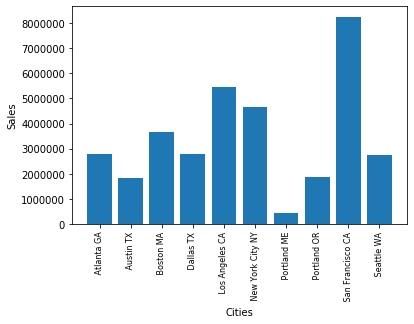

In [116]:
cities=[city for city, df in all_data.groupby('City')]
# The list comprehension is used to make the dataframe in order, I didn't understand this.

plt.bar(cities, results1['Total_sale'])

plt.xticks(cities, rotation='vertical', size=8)

plt.xlabel('Cities')

plt.ylabel('Sales')

In [117]:
all_data['Order data']=pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00


In [0]:
all_data['Hour']=all_data['Order data'].dt.hour

In [119]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00,22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00,15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00,14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00,20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00,19


In [0]:
all_data['Minute']=all_data['Order data'].dt.minute

In [121]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00,15,11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00,19,53


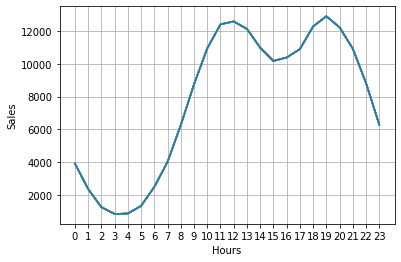

In [122]:
hours=[Hour for Hour,df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00,15,11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00,19,53


In [124]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,2019-08-17 20:12:00,20,12
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,2019-08-17 20:12:00,20,12
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,2019-08-09 09:28:00,9,28
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,2019-08-09 09:28:00,9,28
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,2019-08-02 10:17:00,10,17
63,236730,Wired Headphones,1,11.99,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,11.99,New York City NY,2019-08-02 10:17:00,10,17
132,236799,Google Phone,1,600.00,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,600.00,San Francisco CA,2019-08-01 12:38:00,12,38
133,236799,Wired Headphones,1,11.99,08/01/19 12:38,"309 2nd St, San Francisco, CA 94016",8,11.99,San Francisco CA,2019-08-01 12:38:00,12,38
163,236829,Vareebadd Phone,1,400.00,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,400.00,Los Angeles CA,2019-08-16 08:51:00,8,51
164,236829,USB-C Charging Cable,1,11.95,08/16/19 08:51,"27 2nd St, Los Angeles, CA 90001",8,11.95,Los Angeles CA,2019-08-16 08:51:00,8,51


In [125]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:', '.join(x))
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute,Grouped
46,236716,AA Batteries (4-pack),2,3.84,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,2019-08-17 20:12:00,20,12,"AA Batteries (4-pack), USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,08/17/19 20:12,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,2019-08-17 20:12:00,20,12,"AA Batteries (4-pack), USB-C Charging Cable"
60,236729,iPhone,1,700.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,2019-08-09 09:28:00,9,28,"iPhone, Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,08/09/19 09:28,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,2019-08-09 09:28:00,9,28,"iPhone, Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,08/02/19 10:17,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,2019-08-02 10:17:00,10,17,"Google Phone, Wired Headphones"


In [126]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
46,236716,"AA Batteries (4-pack), USB-C Charging Cable"
60,236729,"iPhone, Apple Airpods Headphones"
62,236730,"Google Phone, Wired Headphones"
132,236799,"Google Phone, Wired Headphones"
163,236829,"Vareebadd Phone, USB-C Charging Cable"


In [127]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

In [128]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00,15,11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00,19,53


In [129]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

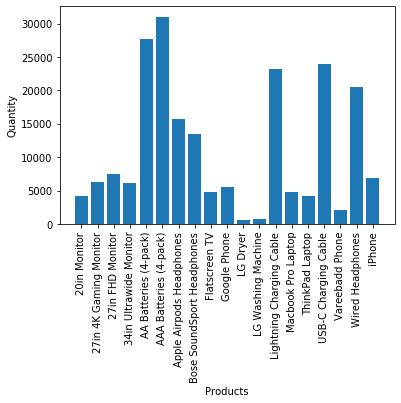

In [130]:
products=[product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

In [131]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sale,City,Order data,Hour,Minute
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,2019-08-31 22:21:00,22,21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,2019-08-15 15:11:00,15,11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,2019-08-06 14:40:00,14,40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,2019-08-29 20:59:00,20,59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,2019-08-15 19:53:00,19,53


In [132]:
prices=all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

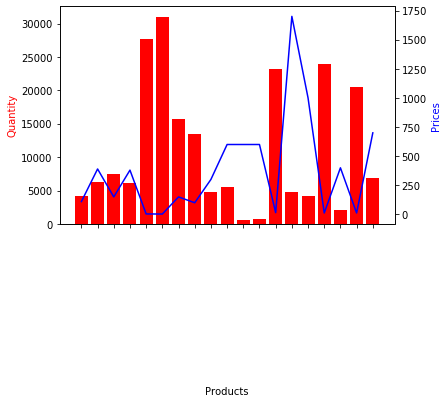

In [163]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity_ordered, color='r')
ax2.plot(products, prices, 'b-', color='b')  #Ask this to Ayushman. Whats the difference between + and - b


ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='r')
ax2.set_ylabel('Prices', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=10, color='w')
plt.show()